![](http://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/EscPolitecnica/EscUpmPolit_p.gif "UPM")

# Trabajo final SITC
## Análisis de sentimientos en Twitter

Departamento de Ingeniería de Sistemas Telemáticos. Universidad Politécnica de Madrid.

Realizado por:
- Juan Bermudo Mera
- Margarita Bolívar Jiménez
- Lourdes Fernández Nieto
- Ramón Pérez Hernández

© 2017

# Mapa del algoritmo RandomForest aplicado sobre el fichero de tweets

## Tabla de contenidos

* [Importación de datos necesarios](#1.-Importación-de-datos-necesarios)
	* [Importación de librerías](#Importación-de-librerías)
    * [Importación de tweets](#Importación-de-tweets)
* [Mapa](#2.-Mapa)

## 1. Importación de datos necesarios

* ### Importación de librerías

In [1]:
# Importamos librerías. Algunas hay que instalarlas con pip install <nombre_paquete>

import numpy as np
import pandas as pd
import PIL
from PIL import ImageDraw, ImageFont
from IPython.display import Image
from scipy.misc import imread, imsave
from colour import Color

* ### Importación de tweets

In [2]:
# Se importan los tweets
tweets=pd.read_csv('ficheros/TweetsConPolaridadYTopic/tweetsRandomForest_polarity_bin.csv')
tweets.head()

,Unnamed: 0,content,Latitude,Longitude,polarity,Topic
0,0,"Regalo para socios: 'Talento a la fuga', el li...",40.416,-3.703,1,otros
1,1,"La recuperación del ‘ladrillo’ dispara el 144,...",40.416,-3.703,1,otros
2,2,TELEVISIÓN SERIES - Cuenta atrás para conocer ...,40.416,-3.703,0,otros
3,3,Nuestra taza de hoy es un homenaje a uno de lo...,40.416,-3.703,1,otros
4,4,@MCadepe nos vemos el 19 de mayooo!!!,40.416,-3.703,1,otros


## 2. Mapa

In [3]:
with open('ficheros/Mapas/tweets_with_polarity_negative_randomforest','w') as file:
    file.write(tweets[['Latitude','Longitude']][tweets.polarity==0].to_string(header=False, index=False))
with open('ficheros/Mapas/tweets_with_polarity_positive_randomforest','w') as file:
    file.write(tweets[['Latitude','Longitude']][tweets.polarity==1].to_string(header=False, index=False))

Retrieving 12 tiles...
... done.


      68 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      68 ms  // Choosing OSM zoom level 9
      68 ms  // scale: 305.748113 meters/pixel (364.088889 pixels/degree)
     128 ms  // input extent: 39.85684488457764,-4.596693328125,41.201191648586104,-3.025648671875
     128 ms  // output extent: -16490.904162607523,-1673.6049664000002,-15846.904411854692,-1101.6050631111111
     128 ms  // creating an appending matrix
     129 ms  // processing data
     129 ms  // reading points from ficheros/Mapas/tweets_with_polarity_negative_randomforest
     824 ms  // read 9752 points
     824 ms  // combining coincident points
     890 ms  // saving image (569 x 641)
    1006 ms  // end


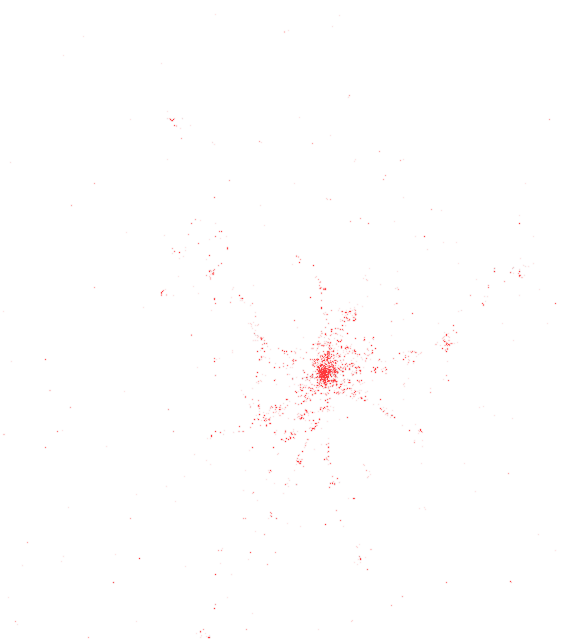

In [4]:
# Capa de tweets negativos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_negative_randomforest \
-W 1000 \
-o ficheros/Mapas/madrid_tweets_polarity_negative_randomforest.png \
-G ficheros/Mapas/red.png \
--decay 0.5  -v -r 2 \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ --layer \
-e 39.865278,-4.585707,41.192925,-3.036635 

Image('ficheros/Mapas/madrid_tweets_polarity_negative_randomforest.png')

Retrieving 12 tiles...
... done.


      65 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      65 ms  // Choosing OSM zoom level 9
      65 ms  // scale: 305.748113 meters/pixel (364.088889 pixels/degree)
     122 ms  // input extent: 39.85684488457764,-4.596693328125,41.201191648586104,-3.025648671875
     122 ms  // output extent: -16490.904162607523,-1673.6049664000002,-15846.904411854692,-1101.6050631111111
     122 ms  // creating an appending matrix
     122 ms  // processing data
     122 ms  // reading points from ficheros/Mapas/tweets_with_polarity_positive_randomforest
    1288 ms  // read 16611 points
    1288 ms  // combining coincident points
    1395 ms  // saving image (569 x 641)
    1505 ms  // end


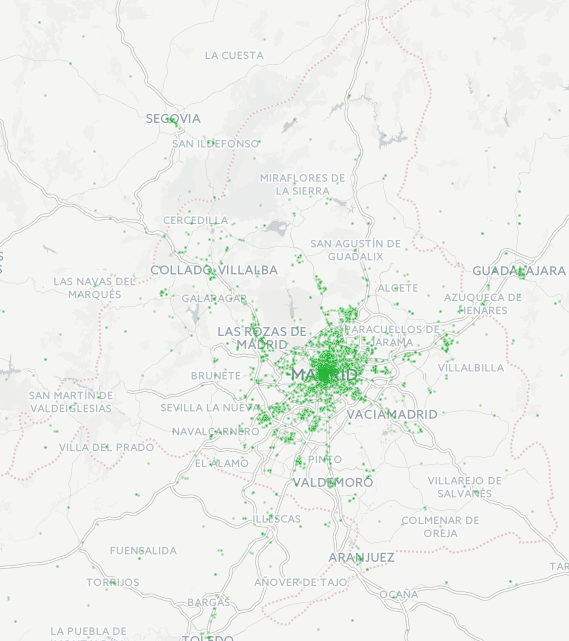

In [5]:
# Capa de tweets positivos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_positive_randomforest \
-W 1000 \
-o ficheros/Mapas/madrid_tweets_polarity_layered_randomforest.png \
-G ficheros/Mapas/green.png \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ \
--decay 0.5  -v -r 2 \
-e 39.865278,-4.585707,41.192925,-3.036635 

Image('ficheros/Mapas/madrid_tweets_polarity_layered_randomforest.png')

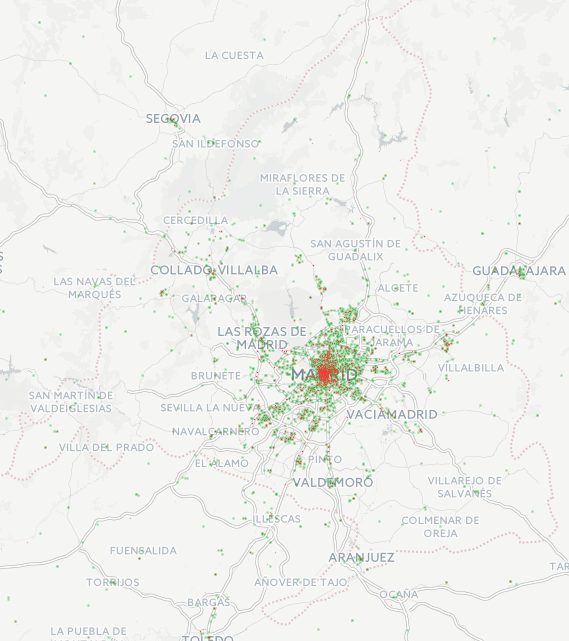

In [6]:
background = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_layered_randomforest.png')
foreground = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_negative_randomforest.png')

background.paste(foreground, (0, 0), foreground)

draw = ImageDraw.Draw(background)

background.save('ficheros/Mapas/madrid_tweets_polarity_randomforest.png')
background

<hr>

## Licencia

El notebook está licenciado libremente bajo la licencia [Creative Commons Attribution Share-Alike](https://creativecommons.org/licenses/by/2.0/).

La base del código empleado procede del trabajo de Manuel Garrido llamado [Dibujando 100k tweets de mi ciudad](http://pybonacci.org/2015/11/16/dibujando-100k-tweets-de-mi-ciudad/).

© 2017 - Juan Bermudo Mera, Margarita Bolívar Jiménez, Lourdes Fernández Nieto, Ramón Pérez Hernández.

Universidad Politécnica de Madrid.